In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from PIL import Image
from IPython.display import Image as IPythonImage

In [3]:
%matplotlib inline

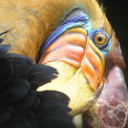

In [4]:
IPythonImage("bird_small.jpg")


In [5]:
im = Image.open("bird_small.jpg")
imdata = np.asarray(im)
imdata.shape

(128, 128, 3)

In [6]:
all_pixels = imdata.reshape(-1, 3).astype(np.float)
all_pixels.shape

(16384, 3)

In [35]:
kmeans = KMeans(8)
kmeans.fit(all_pixels)
pixel_groups = kmeans.predict(all_pixels)

In [36]:
pixel_groups[0:100]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 2, 5, 5,
       5, 0, 5, 2, 4, 1, 3, 3], dtype=int32)

In [37]:
kmeans.cluster_centers_

array([[ 246.43669634,  231.34322453,  191.62660732],
       [  69.28013978,   62.87245195,   61.37682003],
       [ 195.88503755,  143.03870595,   71.37261698],
       [  25.9865554 ,   27.63166435,   25.07371349],
       [ 130.81222977,   98.43174799,   61.86287832],
       [ 218.9049505 ,  181.35128713,  118.41108911],
       [ 140.77548301,  128.43037975,  127.260493  ],
       [ 181.23350785,  178.22827225,  188.87225131]])

In [38]:
new_colors = kmeans.cluster_centers_.astype(np.int)
print(new_colors)

[[246 231 191]
 [ 69  62  61]
 [195 143  71]
 [ 25  27  25]
 [130  98  61]
 [218 181 118]
 [140 128 127]
 [181 178 188]]


In [39]:
new_pixels = np.array([new_colors[c] for c in pixel_groups])
new_pixels.shape

(16384, 3)

In [40]:
new_image_data = new_pixels.reshape((128, 128, 3))

In [41]:
import scipy
scipy.misc.imsave('bird_small_resample.jpg', new_image_data)

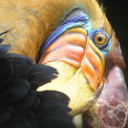

In [42]:
IPythonImage("bird_small.jpg")


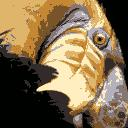

In [43]:
IPythonImage('bird_small_resample.jpg')